In [55]:
#分析通過率
import math
import re
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')



In [56]:
df = pd.read_csv('data/整理後的通過率與鑑別度.csv')  
print(df)  

       年度   類別  科目  題號    數值
0     111  通過率  國文   1  0.88
1     111  通過率  國文   2  0.82
2     111  通過率  國文   3  0.87
3     111  通過率  國文   4  0.85
4     111  通過率  國文   5  0.82
...   ...  ...  ..  ..   ...
4463  103  鑑別度  自然  50  0.43
4464  103  鑑別度  自然  51  0.52
4465  103  鑑別度  自然  52  0.49
4466  103  鑑別度  自然  53  0.48
4467  103  鑑別度  自然  54  0.44

[4468 rows x 5 columns]


In [57]:
vc = df['科目'].value_counts()
print(vc)

社會      1116
自然       964
國文       852
英語       778
數學       464
英語聽力     294
Name: 科目, dtype: int64


In [58]:
subjects = df['科目'].unique()

In [59]:
#計算每年自然有幾題通過率和幾題鑑別度
df2 = df[df['科目'] == '自然']
df2 = df2[df2['類別'] == '鑑別度']

df2.groupby(['年度']).max()
df2.groupby(['年度']).min()
df2.groupby(['年度']).count()


,類別,科目,題號,數值
年度,,,,
103,54,54,54,54
104,54,54,54,54
105,54,54,54,54
106,54,54,54,54
107,54,54,54,54
108,54,54,54,54
109,54,54,54,54
110,54,54,54,54
111,50,50,50,50


In [21]:
#合併鑑別度和通過率
df3 = df.loc[df['類別'] == '鑑別度']
df3.columns = ['年度', '類別', '科目', '題號', '鑑別度']
df3 = df3[['年度', '科目', '題號', '鑑別度']]
#df3.set_index(['年度','科目','題號'],drop=False,inplace=True)


df4 = df.loc[df['類別'] == '通過率']
df4.columns = ['年度', '類別', '科目', '題號', '通過率']
df4 = df4[['年度', '科目', '題號', '通過率']]
#df4.set_index(['年度','科目','題號'],drop=False,inplace=True)

#pd.concat([df3, df4.reindex(df3.index)], axis=1, keys=["年度", "科目", "題號"])

#passing_df =  pd.merge(df3,df4)
#passing_df
#pd.merge(df3,df4 , left_index=True , right_index=True, left_on=['年度','科目','題號'])
passing_df = pd.merge(df3,df4 , left_on=['年度','科目','題號'],right_on=['年度','科目','題號'])




In [22]:
passing_df.to_csv('data/合併後的通過率與鑑別度.csv', index=False,encoding="utf_8_sig")

In [23]:
passing_df.pivot_table(index=['科目'], columns = ['年度'] , values=['通過率','鑑別度'])

通過率                                                              \
年度         103       104       105       106       107       108       109   
科目                                                                           
國文    0.611667  0.624167  0.645417  0.640625  0.629583  0.632917  0.643958   
數學    0.513333  0.532800  0.548800  0.569231  0.586154  0.600385  0.594615   
社會    0.571905  0.605238  0.624603  0.623492  0.617302  0.636667  0.633492   
自然    0.532037  0.541852  0.555741  0.575000  0.566481  0.578333  0.576296   
英語    0.589333  0.553250  0.557073  0.582683  0.570244  0.592195  0.590732   
英語聽力       NaN  0.706190  0.728571  0.740476  0.728095  0.731429       NaN   

                     鑑別度                                                    \
年度         110       103       104       105       106       107       108   
科目                                                                           
國文    0.660000  0.451042  0.448125  0.470833  0.460625  0.436458  0.459167   
數學    0.607692  0.498519  0.479600  0.507600  0.507692  0.528462  0.516154   
社會    0.622381  0.461587  0.439841  0.455556  0.481429  0.474444  0.490476   
自然    0.590556  0.481852  0.480370  0.462778  0.490741  0.468704  0.474444   
英語    0.599756  0.545500  0.545750  0.547561  0.586098  0.560976  0.586585   
英語聽力  0.737143       NaN  0.555238  0.584286  0.568571  0.594286  0.604286   

                          
年度         109       110  
科目                        
國文    0.427500  0.474375  
數學    0.516923  0.517308  
社會    0.476032  0.449524  
自然    0.486667  0.509259  
英語    0.586098  0.578049  
英語聽力       NaN  0.588571

In [34]:
passing_df.pivot_table(index=['科目'], columns = ['年度'] , values=['通過率','鑑別度'],aggfunc = 'count')

通過率                                             鑑別度                    \
年度     103   104   105   106   107   108   109   110   103   104   105   106   
科目                                                                             
國文    48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0   
數學    27.0  25.0  25.0  26.0  26.0  26.0  26.0  26.0  27.0  25.0  25.0  26.0   
社會    63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0   
自然    54.0  54.0  54.0  54.0  54.0  54.0  54.0  54.0  54.0  54.0  54.0  54.0   
英語    60.0  40.0  41.0  41.0  41.0  41.0  41.0  41.0  60.0  40.0  41.0  41.0   
英語聽力   NaN  21.0  21.0  21.0  21.0  21.0   NaN  21.0   NaN  21.0  21.0  21.0   

                              
年度     107   108   109   110  
科目                            
國文    48.0  48.0  48.0  48.0  
數學    26.0  26.0  26.0  26.0  
社會    63.0  63.0  63.0  63.0  
自然    54.0  54.0  54.0  54.0  
英語    41.0  41.0  41.0  41.0  
英語聽力  21.0  21.0   NaN  21.0

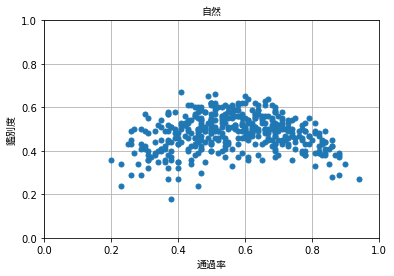

In [25]:

subject = '自然'
x = passing_df[passing_df['科目'] == subject]['通過率']
y = passing_df[passing_df['科目'] == subject]['鑑別度']

fig, ax = plt.subplots()

ax.plot(x, y, marker='o', linestyle='', ms=5)

ax.set_title(subject, fontproperties=myfont)
ax.set_xlabel('通過率' , fontproperties=myfont)
ax.set_ylabel('鑑別度' , fontproperties=myfont)
ax.grid()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])


plt.show()

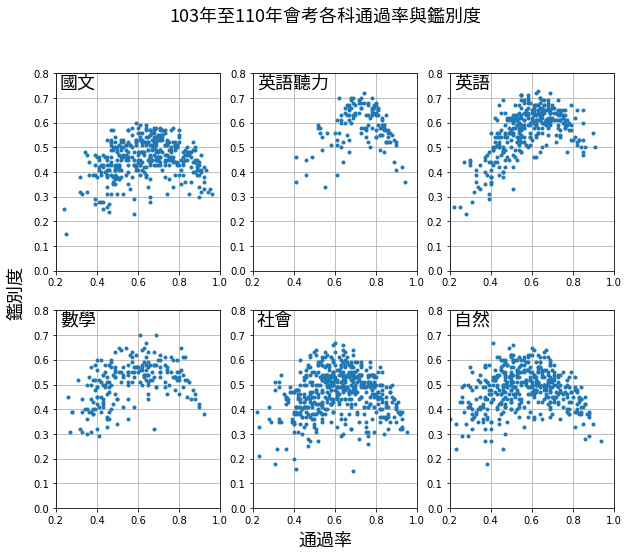

In [35]:
fig , ax = plt.subplots(2, 3, sharex = False, sharey = False)

fig.set_figheight(8)
fig.set_figwidth(10)

title = '103年至110年會考各科通過率與鑑別度'
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.22, 0.74, subjects[i*3 + j] , fontsize=18, ha='left', fontproperties=myfont)
        #在各個子網格寫上文字

        x = passing_df[passing_df['科目'] == subjects[i*3 + j]]['通過率']
        y = passing_df[passing_df['科目'] == subjects[i*3 + j]]['鑑別度']



        ax[i, j].plot(x, y, marker='o', linestyle='', ms = 3)

        #ax[i, j].set_title(subjects[i*3 + j], fontproperties=myfont)
        #ax[i, j].set_xlabel('通過率' , fontproperties=myfont)
        #ax[i, j].set_ylabel('鑑別度' , fontproperties=myfont)
        ax[i, j].grid()
        ax[i, j].set_xlim([0.2, 1])
        ax[i, j].set_ylim([0, 0.8])

fig.text(0.5, 0.07, '通過率', fontsize=18, ha='center', va='center', fontproperties=myfont)
fig.text(0.07, 0.5, '鑑別度', fontsize=18, ha='center', va='center', rotation='vertical', fontproperties=myfont)
fig.suptitle(title , fontsize=18, ha='center', va='center', fontproperties = myfont)
#fig.xlabel('通過率' , fontproperties = myfont)
#fig.ylabel('鑑別度' , fontproperties = myfont)
plt.savefig( title + '.jpg')
plt.show()

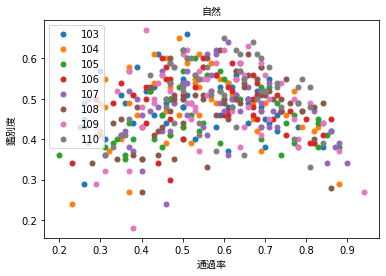

In [38]:
subject = '自然'
x = passing_df[passing_df['科目'] == subject]['通過率']
y = passing_df[passing_df['科目'] == subject]['鑑別度']


groups = passing_df.groupby('年度')


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


for name, group in groups:
    
    x = group[group['科目'] == subject]['通過率']
    y = group[group['科目'] == subject]['鑑別度']

   
    ax.plot(x, y, marker='o', linestyle='', ms=5, label = name)
ax.legend()

ax.set_title(subject, fontproperties=myfont)
ax.set_xlabel('通過率' , fontproperties=myfont)
ax.set_ylabel('鑑別度' , fontproperties=myfont)


plt.show()



In [13]:
'''
df6 = df5.sort_values(by=['通過率'], ascending = False)
df6.values.tolist()
#products_list = df.values.tolist()
'''

"\ndf6 = df5.sort_values(by=['通過率'], ascending = False)\ndf6.values.tolist()\n#products_list = df.values.tolist()\n"

In [43]:
question_df = pd.read_csv('data/從pdf直存df.csv')  



In [44]:
#合併通過率鑑別度與題目
new_df = pd.merge(question_df, passing_df , left_on=['年度','科目','題號'],right_on=['年度','科目','題號'])
new_df

,年度,科目,題號,題目,鑑別度,通過率
0,104,國文,1,1.小敬搬新家，阿嬌欲送禮金表達祝賀之意。下列題辭，何者最適合寫在賀儀封套上？(A)近悅遠來...,0.44,0.79
1,104,國文,2,2.下列文句，何者文意最為通暢？(A)因為你不去，我還是要去(B)他年紀既然小，膽子卻不小(...,0.32,0.94
2,104,國文,3,3.「當部分亞洲國家為了生產足夠的稻米而焦頭爛額之際，泰國稻米的產量卻多到一年出口九百萬噸，...,0.44,0.90
3,104,國文,4,4.下列詞語「」中的字音，何組相同？(A)風聲鶴「唳」／暴「戾」之氣(B)「揖」讓而升／查「...,0.44,0.73
4,104,國文,5,5.「時然後言，人不厭其言。」這句話的涵義，與下列何者最接近？(A)沉默是金，可免禍從口出(...,0.45,0.88
...,...,...,...,...,...,...
1633,110,自然,50,50.()根據表十一，下列何者最可能是小敏想探討的關係？(A)大氣壓力與茶包長度的關係(B)...,0.61,0.68
1634,110,自然,51,51.根據本文，若小敏在向同學說明「茶包天燈」成因後，想要再舉一個科學原理相同的例子，則下列...,0.55,0.79
1635,110,自然,52,52.根據本文，下列有關甲類生物的推論，何者最合理？(A)與三角龍同時期滅亡(B)與劍龍有共...,0.57,0.64
1636,110,自然,53,53.根據上述資料，若在某地最上方的岩層中可找到甲類生物化石，且此地岩層未曾倒轉，下列何者最...,0.53,0.81


In [45]:
subjects = {
    '自然':'nature',
    '社會':'society',
    '國文':'chinese',
    '英語':'english',
    '數學':'math',
    '英語聽力':'listen'}

In [46]:
for key, value in subjects.items():
    print(key,value)

自然 nature
社會 society
國文 chinese
英語 english
數學 math
英語聽力 listen


In [47]:
for key, value in subjects.items():
    print(key,value)
    temp_df = new_df[new_df['科目']==key]
    temp_df = temp_df.rename(columns={'年度': 'year', '科目': 'subject', '題號': 'number', '題目': 'question', '鑑別度': 'dis', '通過率': 'pass'})
    temp_df.to_csv('data/'+ value + '.csv', encoding='utf-8', index=False)


自然 nature
社會 society
國文 chinese
英語 english
數學 math
英語聽力 listen


In [48]:

def create_html(subject,kind):

    htmlFileName = '統計/統計_' + subject + '_' + kind + '.html'

    with open(htmlFileName, 'w', encoding='utf-8' ) as myFile:
        myFile.write('<html>')
        myFile.write('<head>')
        myFile.write('<title>')
        myFile.write( subject + kind )
        myFile.write('</title>')
        myFile.write('</head>')

        myFile.write('<body>')

        #寫入統計資料。

        html_df = new_df.loc[new_df['科目'] == subject]
        html_df = html_df.sort_values(by= [kind], ascending = False)
        html_df = html_df.to_html()


        myFile.write( html_df )
        myFile.write('<hr>')
        pagebreak_txt = '<p style="page-break-after:always"></p>'
        myFile.write(pagebreak_txt)

        myFile.write('</body>')

        myFile.write('</html>')
    

In [49]:
kinds = ['通過率','鑑別度']

for subject in subjects:
    for kind in kinds:
        create_html(subject,kind)


In [50]:
#統計自然科鑑別度
new_df_natural = new_df.loc[new_df['科目'] == '自然']
new_df_natural = new_df_natural.sort_values(by=['鑑別度'], ascending = False)
result_dis = new_df_natural.to_html()
nat = new_df_natural.values.tolist()



for n in nat:
    year = str(n[0])
    num = str(n[2])
    question = n[3]
    discri = str(n[4])
    passing = str(n[5])
    
    print( year + '年 第' + num + '題' + '  鑑別度' + discri + '  通過率:' + passing )
    print(question)
    print('====================')
    print()

    

109年 第41題  鑑別度0.67  通過率:0.41
41.()在製作麵包的過程中，可添加澱粉酶、脂肪酶和蛋白酶等酵素，表六為甲～丁四位同學對於三種酵素主成分的說明，哪一位同學的說明最合理？()表六(A)(B)(C)(D)

104年 第34題  鑑別度0.65  通過率:0.49
34.圖(二十)為小毅某次考卷的部分內容：3圖(二十)此題小毅答錯，老師要他回去訂正，則他只需修改第一行算式中的哪一個數值，就能獲得正確答案？(A)將100改為126(B)將0.58改為1.26(C)將30改為25(D)將30改為55

110年 第13題  鑑別度0.65  通過率:0.6
13.小新專題研究的題目是「日常生活的食物油條」，他在報告中提到：(NHHCO)「部分業者使用碳酸氫銨做為食品膨鬆劑，在高溫油炸的過程43中，碳酸氫銨會分解產生三種氣體，使緊實的麵糰迅速膨脹成膨鬆的油條。」上述產生的三種氣體中，不可能含有下列何者？(A)氨氣(B)氯化氫(C)水蒸氣(D)

107年 第27題  鑑別度0.64  通過率:0.61
27.()大瀚在整理野外記錄的地質資料，圖十九是根據資料用鉛筆初步繪製但尚未完成的地層剖面示意圖。此外，資料上還記載著該地層同時存在斷層與岩脈，且由斷層與岩脈的關係可知剖面中的岩脈是在斷層活動之後才形成。若岩脈以灰色表示，斷層以粗黑()圖十九實線表示，則完成後的示意圖最接近下列何者？(A)(B)(C)(D)

110年 第15題  鑑別度0.64  通過率:0.67
15.(HCl)pH患有「胃酸過多症」的患者，即使空腹也會大量分泌胃酸，使胃液的值在左右，並引起胃灼熱或胃痛等症狀。此時，可服用胃藥，胃藥中的成pH分如碳酸氫鈉，能與胃酸發生中和反應，使胃液的值暫時，並緩解胃灼熱及胃痛等症狀。上述畫線處，依序應填入下列何者才比較合理？(A)1257(B)8956～；上升到～～；下降到～(C)7889(D)3412

109年 第22題  鑑別度0.63  通過率:0.66
22.有關目前對太陽系的認識，下列敘述何者正確？(A)八大行星中類地行星與類木行星數量相同(B)銀河系與太陽系擁有的恆星數量大致相同(C)類地行星主要是由氣體、冰等物質所組成(D)

107年 第26題  鑑別度0.62  通過率:0.58
26.()圖十八為竹子與其鄰近竹筍的生長示意圖

In [19]:
df

,年度,類別,科目,題號,數值
0,109,通過率,國文,1,0.92
1,109,通過率,國文,2,0.91
2,109,通過率,國文,3,0.95
3,109,通過率,國文,4,0.91
4,109,通過率,國文,5,0.90
...,...,...,...,...,...
3993,110,通過率,自然,50,0.68
3994,110,通過率,自然,51,0.79
3995,110,通過率,自然,52,0.64
3996,110,通過率,自然,53,0.81


In [20]:
#統計自然科通過率
new_df_natural = new_df.loc[new_df['科目'] == '自然']
new_df_natural = new_df_natural.sort_values(by=['通過率'], ascending = False)
result_pass = new_df_natural.to_html()
nat = new_df_natural.values.tolist()
for n in nat:
    year = str(n[0])
    num = str(n[2])
    question = n[3]
    discri = str(n[4])
    passing = str(n[5])
    
    print( year + '年 第' + num + '題' + '  通過率:' + passing + '  鑑別度' + discri)
    print(question)
    print('====================')
    print()


109年 第2題  通過率:0.94  鑑別度0.27
2.如圖(一)所示，美美想把燒杯中的液體倒入滴定管中，她搭配下列哪一項器材來使用，最適合且最能避免在傾倒液體時灑出？(A)(B)(C)(D)

107年 第49題  通過率:0.9  鑑別度0.34
49.根據本文，推測下列何者最可能為偏側蛇蟲草菌與螞蟻間的關係？(A)寄生(B)合作(C)競爭空間(D)競爭食物

104年 第1題  通過率:0.88  鑑別度0.29
1.圖(一)是生物進行某種生理作用的示意圖，圖中箭頭(cid:31)(cid:30)(cid:29)(cid:28)代表能量或物質在葉片中的進出，此生理作用最可(cid:30)(cid:25)能是下列何者？(cid:23)(cid:22)(cid:27)(cid:26)(A)呼吸作用(B)蒸散作用(C)光合作用(D)觸發運動

105年 第4題  通過率:0.88  鑑別度0.38
4.取溫度、材質及體積相同的甲、乙兩金屬球，將甲球漆成白色，乙球漆成黑色，再將兩球以細線並排懸吊於空中，放置在陽光下曝曬，20分鐘後測量兩者溫度，結果乙球比甲球高3℃，下列何者是此現象發生的主要原因？(A)白色可增加金屬球的比熱(B)黑色可增加金屬球的比熱(C)白色金屬球較易吸收輻射熱(D)黑色金屬球較易吸收輻射熱

107年 第3題  通過率:0.88  鑑別度0.39
3.某次地震發生後，測站甲、乙、丙、丁測得的震度如表(一)所示。已知測站與震央距離的大小關係為丁＞丙＞乙＞甲，若將此次地震的震央位置以表示，甲、乙、丙、丁代表其測站位置，下列有關此次地震的震度分布及測站的位置圖，何者最合理？(A)(B)(C)(D)

109年 第1題  通過率:0.88  鑑別度0.37
1.牛背鷺為一種鳥類，常飛至牛的背上，靠食用牛身上的寄生蟲與草地中的昆蟲維生。根據上述提及生物的交互關係，下列推論何者最合理？(A)牛背鷺與牛為共生關係(B)牛背鷺與寄生蟲為共生關係(C)寄生蟲主要寄生於牛背鷺與牛身上(D)寄生蟲與牛背鷺競爭牛身上的食物

107年 第2題  通過率:0.87  鑑別度0.38
2.圖(二)是某日東亞的地面天氣簡圖，數字代表該等壓線的氣壓值，單位為百帕。圖中以黑點標示的甲地，其海拔高度約為0m。下列是甲地已知的天氣現象敘述，何者無法從此天氣簡圖中得知？(A)氣溫為

In [21]:
question_df[question_df['科目'] == '英語']

,年度,科目,題號,題目
47,104,英語,1,1. Look at the picture. The girl drew two ...
48,104,英語,2,"2. This dress is pretty, it does n..."
49,104,英語,3,3. Getting up early on a cold morning is not ...
50,104,英語,4,4.\t Tonight\tI’ll\tstay\tat\tthe\toffice\tunt...
51,104,英語,5,5. Charles a day in the department...
...,...,...,...,...
1445,110,英語,37,37. (A) crazy (B) good (C) lucky ...
1446,110,英語,38,38. (A) are all coming (B) have all come (C...
1447,110,英語,39,39. (A) another (B) one (C) the last ...
1448,110,英語,40,40. (A) have (B) did (C) had (D) would
